# **Simple Topic Introduction**

## ***Time Series Data***

A time series is a sequence of data points collected or recorded at regular time intervals. It can show trends (long-term increase or decrease), seasonality (regular patterns over time), and noise (random variations). Examples include stock prices, weather data, and electricity usage.


## ***Recurrent Neural Network (RNN)***

RNNs are a type of neural network designed for sequence data. Unlike regular neural networks, RNNs can remember previous inputs using a "hidden state." This helps them learn patterns over time. RNNs are used for tasks like time-series forecasting, speech recognition, and language modeling.

**Key features of RNNs**:

  * **Hidden State**: RNNs maintain a hidden state that is updated at each time step based on the input and the previous hidden state. This allows the network to remember information over time.
  * **Parameter Sharing**: The same weights are used across different time steps, which helps in learning patterns in sequences without having to learn a new set of parameters for each position in the input sequence.
  * **Backpropagation Through Time (BPTT)**: A variant of the backpropagation algorithm used to train RNNs that accounts for the sequential nature of the data and the dependencies across time steps.



## ***Vanishing Gradient Problem***

When training RNNs using backpropagation through time (BPTT), the gradients (used to update the model's weights) can become very small. This makes it hard for the model to learn long-term patterns. As a result, standard RNNs often forget important information from earlier in the sequence.

## ***Long Short Term Series (LSTM)***
LSTMs are an improved version of RNNs designed to remember information over long periods. They use special gates (input, forget, and output) to control what information is kept or forgotten. This helps overcome the vanishing gradient problem and makes them great for time-series prediction.

# **Dataset Introduction**

This dataset contains historical stock price data for Amazon.com, Inc. from 2006 to 2018. It includes daily records of the opening price, high, low, close, and trading volume. The data is time-indexed and suitable for time-series analysis.

## ***Business Understanding***

Stock price prediction is critical for investors and financial analysts. Being able to forecast future prices, even one day ahead, can support investment decisions, reduce risk, and increase profit. Amazon, being a major tech company, provides a valuable case for this.

## ***Goals***

* **Explore** trends and seasonality in Amazon's stock price over time.
* **Preprocess** the data for modeling (scaling, splitting, reshaping).
* **Train** an RNN model (with LSTM or GRU layers) to predict the next day's stock price.
* **Evaluate** and **analyze** the model’s performance to understand its forecasting accuracy.



In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dense, Dropout,Bidirectional
import warnings
warnings.filterwarnings('ignore')

import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
data = pd.read_csv('AMZN 2006-2018.csv', index_col='Date', parse_dates=['Date'])
data.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [3]:
data['Name'].value_counts()
# i drop the 'Name' because we only use the AMZN data

,count
Name,
AMZN,3019


In [4]:
# drop Name
data = data.drop(['Name'], axis=1)

# **Exploratory Data Analysis**

In [5]:
data.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,299.335310,302.371163,296.037695,299.376231,5.931712e+06
std,280.120547,281.826442,277.927134,279.980161,5.122034e+06
min,26.090000,26.300000,25.760000,26.070000,9.864350e+05
25%,81.175000,82.580000,79.725000,81.090000,3.137037e+06
50%,205.330000,208.000000,202.100000,205.440000,4.724100e+06
75%,375.570000,379.155000,373.000000,375.140000,7.135246e+06
max,1204.880000,1213.410000,1191.150000,1195.830000,1.044046e+08


* **Price Growth**: The stock price grew significantly from a minimum close of **\$26.07** to a maximum of **\$1195.83**, indicating strong long-term growth from 2006 to 2018.
* **Spread**: The standard deviation is high (**\~\$280**), suggesting high price volatility.
* **Skewed Distribution**: The mean is higher than the median, implying a **right-skewed** distribution (some very high prices pull the average up).
* **Volume**: Trading volume ranges widely, from under **1 million** to over **104 million**, reflecting varying investor interest.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 141.5 KB


It should be 4,383 days
1 January 2006 – 1 January 2018

But stock market close on weekend, so only 249-251 days per year

## ***Price Trends***

The **closing price** is the last price at which a stock is traded on a given day. It’s often used to track a stock’s daily performance and is commonly shown on charts and financial reports. Investors rely on it to analyze trends, compare prices across days, and make decisions about buying or selling.

Text(0, 0.5, 'Close Price USD ($)')

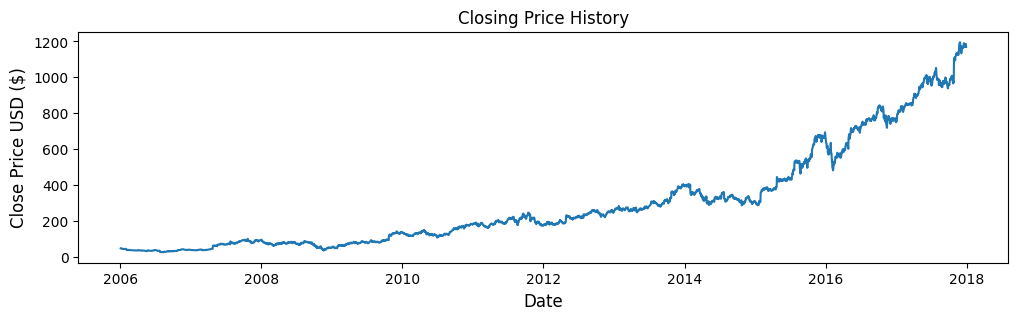

In [7]:
# close price line graph
plt.figure(figsize=(12,3))
plt.title('Closing Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)

This chart shows that Amazon’s stock price went up a lot between 2006 and 2017. At first, the price was low and moved slowly. But starting around 2015, the price started rising much faster. There are some small drops along the way, but overall, the price kept going up. This means the **company was growing and more people wanted to invest in it.**


**Volume of Sales** refers to how many shares of a stock are bought and sold in a day. It shows how active the trading is. High volume means many people are buying and selling, which can signal strong interest or big news. Low volume means fewer trades and less activity. Traders often use volume to understand market trends and confirm whether a price move is strong or weak.

Text(0, 0.5, 'Volume')

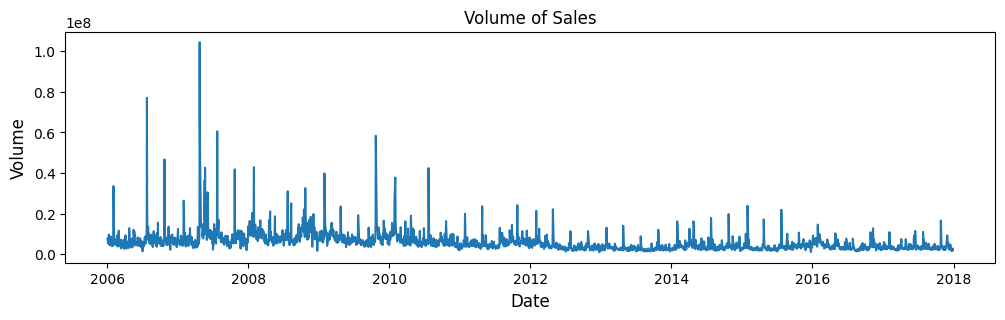

In [8]:
# volume sales line chart
plt.figure(figsize=(12,3))
plt.title('Volume of Sales')
plt.plot(data['Volume'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)

The chart shows that the volume of stock sales was much higher and more active from 2005 to around 2010, with many sharp spikes. This means a lot of people were buying and selling during that time, likely due to major news or events like the 2008 financial crisis. After 2010, the trading volume slowly decreased and became more stable, with fewer spikes, showing less activity in later years. **If a lot of volume occurs during a price change, it could mean the market is reacting strongly to news or events**.

<Figure size 1200x800 with 0 Axes>

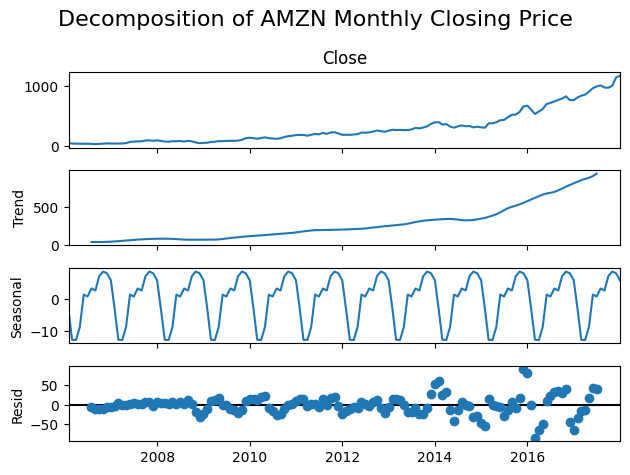

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = data['Close']

# resampling menjadi data bulanan (karena data saham biasanya harian
# dan seasonal akan lebih terlihat dalam agregasi bulanan)
monthly_series = series.resample('M').mean()
decompose_result = seasonal_decompose(monthly_series, model='additive', period=12)

plt.figure(figsize=(12, 8))
decompose_result.plot()
plt.suptitle('Decomposition of AMZN Monthly Closing Price', fontsize=16)
plt.tight_layout()
plt.show()

1. **Observed (Top Plot: Close)**

* This is the original time series showing Amazon’s monthly closing prices from 2006 to 2018.
* We can clearly see a **long-term upward trend**, especially accelerating after 2012.
* There are some fluctuations, but overall, the pattern is upward.

2. **Trend**

* This isolates the **underlying trend** by removing seasonal and irregular components.
* It shows a **steady increase** in stock prices over the years.
* The curve becomes steeper after 2013, indicating **accelerated growth** in that period.

3. **Seasonal**

* This component reveals **repeating patterns** that occur every 12 months (because we used `period=12`).
* It shows small **regular ups and downs** that repeat every year.
* In stock data, this could be due to **annual investor behavior**, holiday seasons, or earnings reports.

4. **Residual**

* These are the **random fluctuations** that are not explained by trend or seasonality.
* It captures **unexpected events**, market shocks, or irregular movements in the stock price.
* These values are scattered and don’t show a clear pattern, as expected.


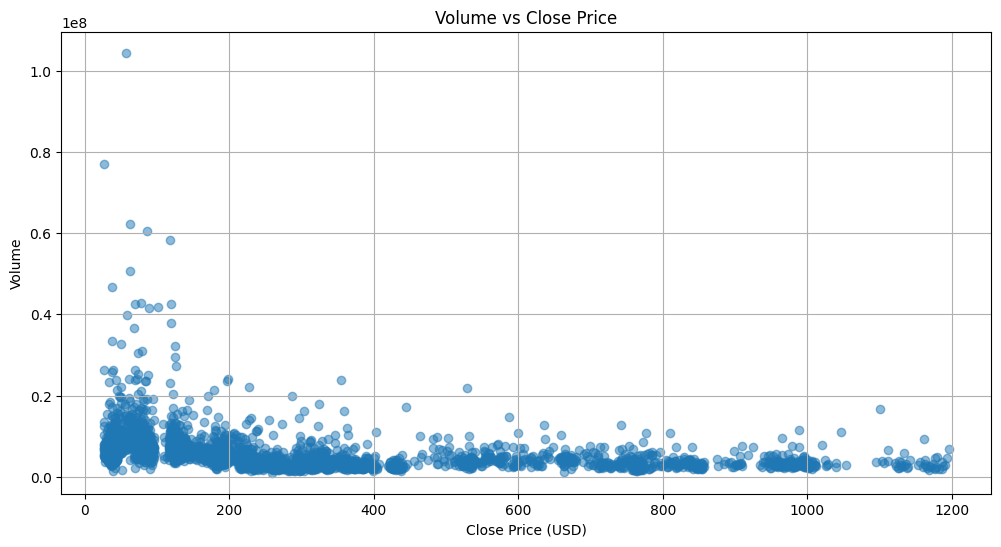

In [10]:
# plot Volume vs Close
plt.figure(figsize=(12, 6))
plt.scatter(data['Close'], data['Volume'], alpha=0.5)
plt.title('Volume vs Close Price')
plt.xlabel('Close Price (USD)')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

This scatter plot shows the relationship between Amazon’s closing stock price and trading volume. It shows that when the stock price was low (under \$200), the trading volume was generally higher. **As the stock price increased over time, the trading volume became lower and more stable**. This could mean that earlier in Amazon's growth, more shares were traded actively, while later, even as the price rose, fewer trades were made, **possibly because investors were holding onto their shares longer**.

**The moving average (MA)** is a basic tool used in stock analysis to help see the overall trend by smoothing out short-term price changes. It works by calculating the average stock price over a chosen time period, like 10 days, 30 days, or any length we prefer, and updates the average as new prices come in.


<Figure size 1500x600 with 0 Axes>

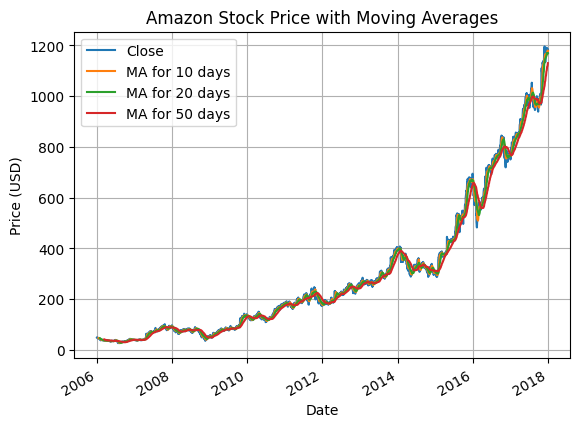

In [11]:
ma_day = [10, 20, 50]

# calculate moving averages using 'Close' since 'Adj Close' is not available
for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Close'].rolling(ma).mean()

plt.figure(figsize=(15, 6))
data[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title('Amazon Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

From the chart, we can see that all three moving averages follow the price closely but with different levels of smoothness. The **10-day MA** reacts quickly to price changes and stays close to the blue line. The **20-day MA** is slightly smoother, and the **50-day MA** is the smoothest, showing the long-term trend with less noise.

Overall, the moving averages confirm a strong upward trend in Amazon’s stock from 2006 to 2018. When the price is above the MAs, it usually signals a **bullish trend**. These MAs help reduce short-term price fluctuations and make it easier to spot long-term trends.

## ***Returns***

The **average daily return** of a stock shows how much the stock price changes, on average, from one day to the next. It helps us understand how the stock typically performs each day. By calculating daily returns using pandas, we can see the stock’s average growth or decline over time, which is useful for measuring its performance and risk level.


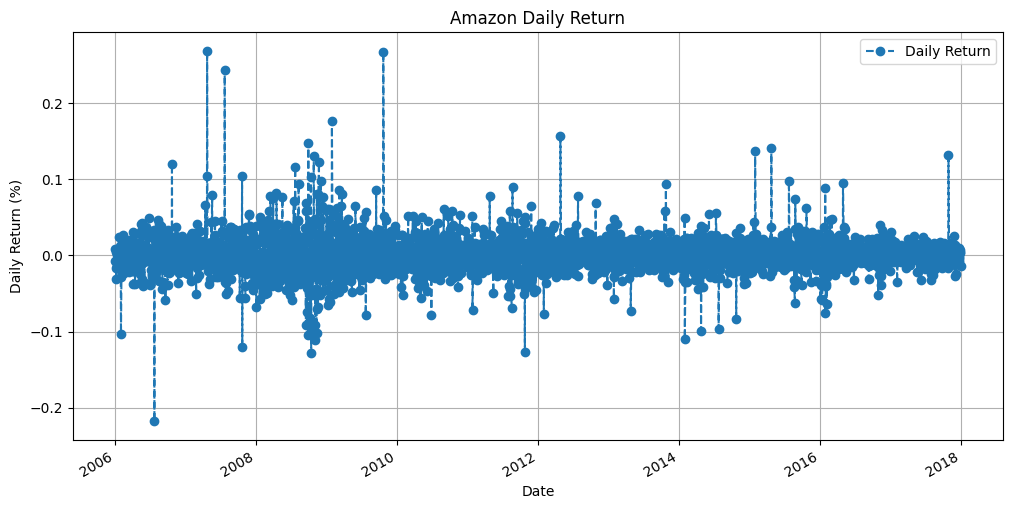

In [12]:
data['Daily Return'] = data['Close'].pct_change()
plt.figure(figsize=(12, 6))
data['Daily Return'].plot(legend=True, linestyle='--', marker='o')
plt.title('Amazon Daily Return')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.show()

The graph shows Amazon's daily return percentages over several years, from 2006 to 2018. It displays a lot of fluctuations, with both positive and negative returns, indicating volatility in Amazon's stock price. The returns appear to range between -0.2% and 0.2% most of the time, but there are several sharp spikes, suggesting some days with significantly higher or lower returns. These fluctuations are expected in stock markets, and they highlight the risk and unpredictability of daily stock returns. The pattern over time seems fairly consistent, but occasional large spikes stand out.


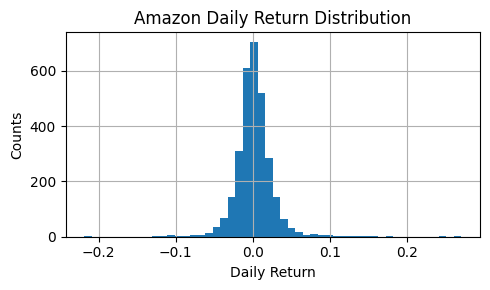

In [13]:
plt.figure(figsize=(5, 3))
data['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('Amazon Daily Return Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()

The graph shows how Amazon's stock price changes every day from 2006 to 2018. Most days, the price doesn't change much, staying close to 0%. However, there are some days where the price goes up or down a lot, shown by the big jumps on the graph. These bigger changes don't happen often, but they do stand out when they do occur. Overall, Amazon's stock has a lot of small daily changes with a few big changes here and there.

In [14]:
print(data['Daily Return'].describe())

# show extreme daily returns (like top/bottom 1%)
outliers = data[(data['Daily Return'] > 0.05) | (data['Daily Return'] < -0.05)]
print("\nPotential Outlier Days:\n", outliers[['Close', 'Daily Return']])

count    3018.000000
mean        0.001374
std         0.025209
min        -0.218220
25%        -0.009899
50%         0.000414
75%         0.012484
max         0.269497
Name: Daily Return, dtype: float64

Potential Outlier Days:
               Close  Daily Return
Date                             
2006-02-03    38.33     -0.103182
2006-07-26    26.26     -0.218220
2006-09-21    30.22     -0.059153
2006-10-25    37.68      0.120428
2007-02-27    38.83     -0.050147
...             ...           ...
2016-01-29   587.00     -0.076100
2016-02-05   502.13     -0.063645
2016-04-29   659.59      0.095664
2016-10-28   776.32     -0.051371
2017-10-27  1100.95      0.132164

[128 rows x 2 columns]


The daily return of Amazon stock shows that, on average, the price increases by about 0.14% each day. Most of the time, the stock moves up or down within a small range, about 2.5%. However, there are some days with much bigger changes. For example, the largest daily drop was around 21.8%, and the biggest gain was about 26.9%. These big moves are called outliers, and they usually happen during important events like earnings announcements or major market news. In total, there were 128 days with changes larger than 5% in either direction, which shows that while most days are calm, there are occasional spikes in volatility.

In [15]:
# daily returns for Amazon
rets = data['Close'].pct_change().dropna()

# the expected return and risk (standard deviation)
expected_return = rets.mean()
risk = rets.std()

print(f"Expected Return for Amazon: {expected_return:.4f}")
print(f"Risk (Standard Deviation) for Amazon: {risk:.4f}")

Expected Return for Amazon: 0.0014
Risk (Standard Deviation) for Amazon: 0.0252


The expected return of 0.14% means that, on average, Amazon's stock price is expected to increase by about 0.14% per day. This is a small positive change, indicating that the stock has a slight upward trend overall.

The risk or volatility of 2.52% means that Amazon’s stock price tends to fluctuate by around 2.5% up or down each day. This tells us that the stock can experience daily price movements of about 2.5%, which is considered a moderate level of risk in stock trading.

**So we can say, the stock is slightly increasing over time. But it also has noticeable daily ups and downs.This helps investors understand the balance between potential reward (return) and risk (volatility).**

## ***Correlation***

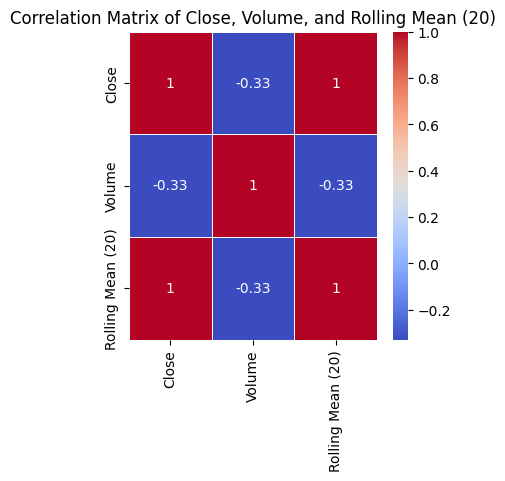

In [16]:
data['Rolling Mean (20)'] = data['Close'].rolling(window=20).mean()
corr_matrix = data[['Close', 'Volume', 'Rolling Mean (20)']].corr()

import seaborn as sns
plt.figure(figsize=(4, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Close, Volume, and Rolling Mean (20)')
plt.show()

1. **Close vs. Volume**: The correlation between the close price and the volume is **-0.33**, indicating a weak negative relationship. This suggests that as the volume increases, the close price tends to slightly decrease, or vice versa, though the relationship is not very strong.

2. **Close vs. Rolling Mean (20)**: The correlation between the close price and the 20-period rolling mean is **1**, meaning there is a perfect positive correlation and that indeed is natural. This is expected because the rolling mean follows the trend of the Close price.

3. **Volume vs. Rolling Mean (20)**: The correlation between the volume and the 20-period rolling mean is **-0.33**, similar to the relationship between the close price and volume. Again, this indicates a weak negative relationship, suggesting that as the volume increases, the 20-period rolling mean tends to slightly decrease, though the relationship is weak.

Overall, the results show a strong relationship between the close price and the 20-period rolling mean, a moderate negative relationship between the close price and volume, and a weak negative relationship between volume and the rolling mean.

# **Preprocessing**

The **Partial Autocorrelation Function (PACF)** is a tool used to measure how much the past values of a time series are related to the current value, but it removes the influence of other time steps in between.

In simple words, it helps us understand the direct relationship between a current value and a specific past value, without being affected by other previous values. For example, when predicting the stock price for today, PACF helps us know if yesterday’s price (or two days ago, or three days ago) is directly related to today’s price, after excluding the influence of other days.

By looking at the PACF, we can decide which past days' prices (lags) are important for making the prediction, so we can use only the most relevant past information to build a better prediction model.


In [17]:
from statsmodels.tsa.stattools import pacf

df_close = data['Close']

# PACF for the closing price
pacf_values = pacf(df_close, nlags=40)
print(pacf_values)

[ 1.00000000e+00  9.98302349e-01 -2.41835498e-02  6.66099971e-03
  1.12248101e-02  1.47689411e-02 -1.17475558e-02 -2.23162394e-03
 -1.03296430e-02 -4.71079066e-03  4.58474572e-03  6.57834354e-03
  6.20303894e-03 -7.55891444e-04 -2.97453159e-03  5.68510129e-03
  2.31807767e-03  4.44716542e-03  4.06145191e-03  4.53576824e-04
 -4.06310840e-02 -2.21365333e-02  1.68934287e-02 -3.62509284e-02
 -1.14709051e-02  1.14182465e-02  3.33558293e-02  1.75166325e-02
  1.16144452e-02 -4.32657216e-03  4.42435640e-03  1.38742702e-02
 -8.52281584e-03  4.13004484e-05 -5.86771647e-03 -1.56697757e-02
 -8.42016555e-03  6.10650753e-03  4.26610132e-03  1.57327576e-02
  2.26568820e-02]


In [18]:
# 95% confidence level, calculate the confidence interval
conf_interval = 1.96 / np.sqrt(len(df_close))

significant_lags = np.where(np.abs(pacf_values) > conf_interval)[0]
print(f"Significant Lags: {significant_lags}")

Significant Lags: [ 0  1 20 23]


Given these significant lags, the most immediate and probable influences on the current stock price are:
  * Lag 1: The price from the previous time step is likely to be the strongest influence on today’s price.
  * Lag 20 and Lag 23: These lags indicate that longer-term trends (from 20 and 23 time steps ago) are also relevant, but likely not as strong as the immediate past.

In practice, we would likely prioritize Lag 1 as the most immediate predictor for the RNN model and consider Lag 20 and Lag 23 as additional features to capture any longer-term trends or cycles in the stock price.

In [19]:
# normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close']].values)

# create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 20  # look back 20 days
X, y = create_sequences(scaled_data, seq_length)

We need to **scale the data** because models like RNN, LSTM, or GRU are very sensitive to the **range of input values**. If the features have large differences in magnitude (ex: stock prices from 500 to 10,000), it can cause the training to become **unstable or slow**.

Why use **MinMaxScaler**?
* **MinMaxScaler** transforms data to a fixed range, usually **0 to 1**, which works well with activation functions like **sigmoid** or **tanh** (commonly used in LSTM/RNN).
* It helps the model **converge faster and more reliably**, and ensures no feature dominates due to its scale.

So scaling helps the model learn better, and MinMaxScaler is a simple and effective choice for time-series data like stock prices.


In [20]:
# split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train.shape, X_test.shape

((2399, 20, 1), (600, 20, 1))

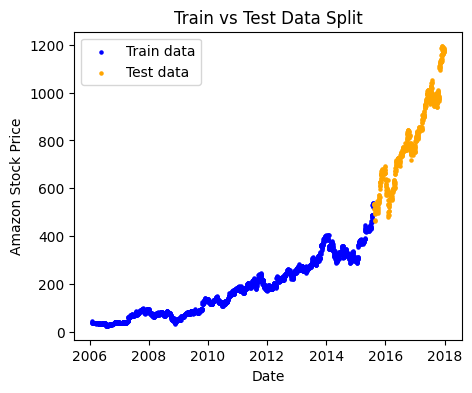

In [21]:
# full list of dates, shifted to match the y targets
dates = data.index[seq_length:]

train_dates = dates[:split]
test_dates = dates[split:]

# invert the scaling for plotting actual prices (optional)
y_train_inv = scaler.inverse_transform(y_train)
y_test_inv = scaler.inverse_transform(y_test)

plt.figure(figsize=(5, 4))
plt.scatter(train_dates, y_train_inv, s=5, color='blue', label='Train data')
plt.scatter(test_dates, y_test_inv, s=5, color='orange', label='Test data')
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price')
plt.title("Train vs Test Data Split")
plt.legend()
plt.show()

# **Implement RNN Baseline using LSTM**

In [22]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

**EarlyStopping** is used to **stop training early** if the model's performance on the validation set **stops improving**.

It helps **prevent overfitting** and **saves time** by stopping training when the model isn’t getting any better (based on `val_loss`) for several epochs (`patience=5` means wait 5 epochs before stopping).
`restore_best_weights=True` makes sure the model keeps the weights from the best-performing epoch.


In [23]:
# add EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [24]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - loss: 0.0033 - val_loss: 2.9242e-04
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 3.2288e-04 - val_loss: 4.4725e-04
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.1125e-04 - val_loss: 2.8599e-04
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.5758e-04 - val_loss: 3.6542e-04
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.5566e-04 - val_loss: 0.0010
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 1.8560e-04 - val_loss: 3.3523e-04
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.9127e-04 - val_loss: 2.1645e-04
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.7362e-04 - val_loss: 5.2925e-04
Epoch 9/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.6475e-04 - val_loss: 1.9572e-04
Epoch 10/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1.7001e-04 - val_loss: 5.2784e-04
Epoch 11/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 1.465

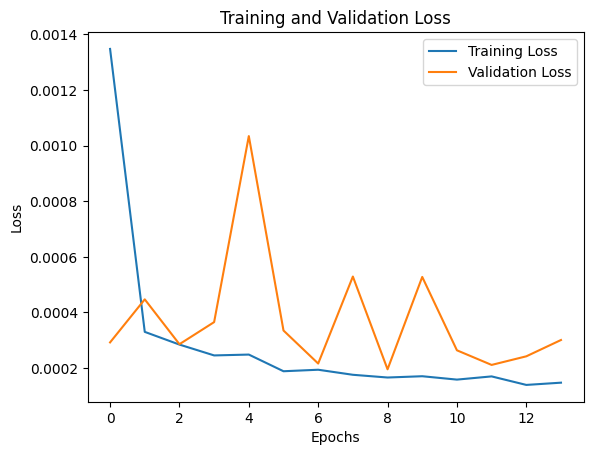

In [25]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# **Evaluation**

In [34]:
from sklearn.metrics import r2_score, mean_absolute_error

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


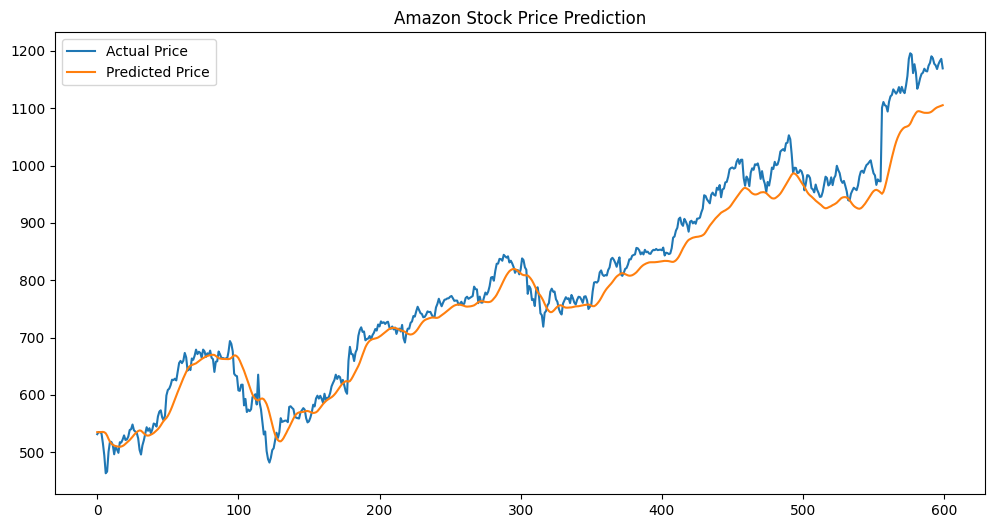

In [26]:
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title("Amazon Stock Price Prediction")
plt.legend()
plt.show()

In [27]:
# prediction
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# invert predictions and true labels
trainPredict = scaler.inverse_transform(trainPredict)
trainy_inv = scaler.inverse_transform(y_train.reshape(-1, 1))

testPredict = scaler.inverse_transform(testPredict)
testy_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# calculate RMSE
trainScore = np.sqrt(mean_squared_error(trainy_inv, trainPredict))
testScore = np.sqrt(mean_squared_error(testy_inv, testPredict))

print(f"Baseline RNN Train RMSE: {trainScore:.2f}")
print(f"Baseline RNN Test RMSE: {testScore:.2f}")

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Baseline RNN Train RMSE: 10.26
Baseline RNN Test RMSE: 39.09


The model shows a significant gap between training and testing performance, with a training RMSE of 10.26 and a much higher testing RMSE of 39.09. This indicates that the model is likely overfitting the training data, it has learned the training patterns very well but fails to generalize effectively to unseen data. While it performs accurately on known inputs, its predictive power on new data is weak, which reduces its reliability in real-world forecasting.

In [28]:
trainMAE = mean_absolute_error(trainy_inv, trainPredict)
testMAE = mean_absolute_error(testy_inv, testPredict)

print(f"Train MAE: {trainMAE:.2f}")
print(f"Test MAE: {testMAE:.2f}")

Train MAE: 7.36
Test MAE: 29.63


The model's Mean Absolute Error (MAE) on the training set is 7.36, while on the test set it rises significantly to 29.63. This again confirms signs of **overfitting**, where the model performs well on the training data but struggles to make accurate predictions on unseen data. The large gap between training and test MAE suggests that the model may be too complex or not generalizing well, and could benefit from further tuning, regularization, or reevaluation of input features (such as lag selection).

(But imputing 1 and 23 is worse)

In [30]:
from sklearn.metrics import r2_score

# Calculate R²
trainR2 = r2_score(trainy_inv, trainPredict)
testR2 = r2_score(testy_inv, testPredict)

print(f"Train R²: {trainR2:.2f}")
print(f"Test R²: {testR2:.2f}")

Train R²: 0.99
Test R²: 0.95


The R² scores indicate that the model explains **99% of the variance** in the training data and **95% in the test data**, which are both very high. Despite earlier signs of overfitting from RMSE and MAE, the high R² on both sets suggests the model still captures the overall trend quite well. In other words, while the model's individual predictions may have larger errors (as seen in MAE), its ability to follow the general direction of the stock price is still strong. This means the model has **good predictive power**, but may need fine-tuning to reduce the size of the errors.


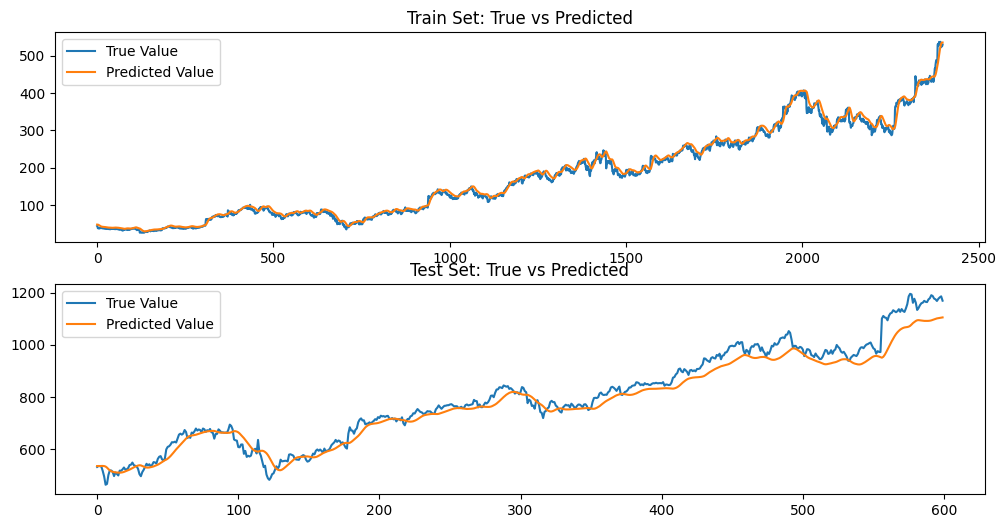

In [31]:
plt.figure(figsize=(12,6))

#  training data predictions
plt.subplot(2, 1, 1)
plt.plot(trainy_inv, label='True Value')
plt.plot(trainPredict, label='Predicted Value')
plt.title('Train Set: True vs Predicted')
plt.legend()

#  test data predictions
plt.subplot(2, 1, 2)
plt.plot(testy_inv, label='True Value')
plt.plot(testPredict, label='Predicted Value')
plt.title('Test Set: True vs Predicted')
plt.legend()

plt.show()

The plot shows how well the model predicts the values for both the training and test sets.

**Train Set:**

* In the top graph, the true and predicted values are very close, which means the model is doing a good job of learning from the training data.

**Test Set:**

* In the bottom graph, the true and predicted values are also close, but there's a small difference toward the right. This shows that the model is still doing well on new, unseen data, but there are a few minor mistakes as the data increases.

**Conclusion:**

* Overall, the model is performing well for both the training and test sets, with only a few small errors in the test set.

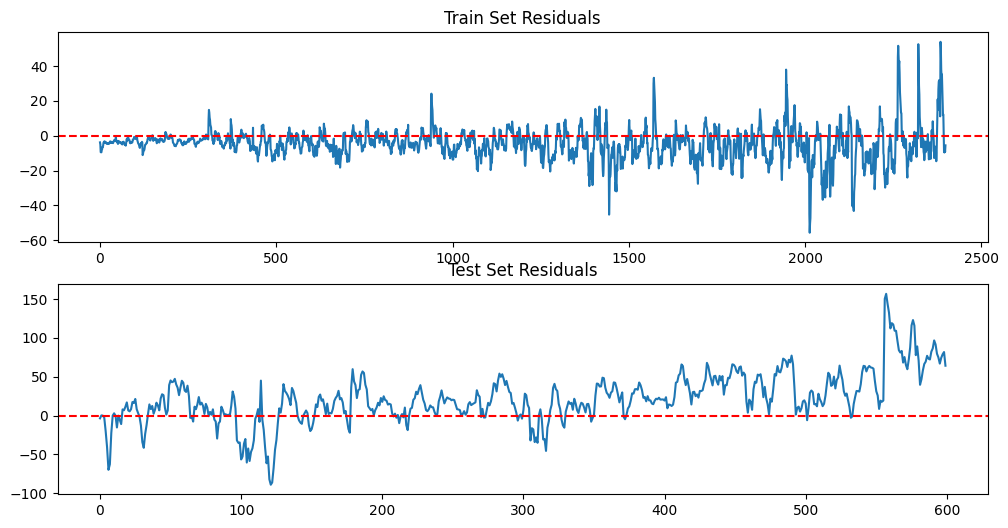

In [32]:
# residuals (errors)
trainResiduals = trainy_inv - trainPredict
testResiduals = testy_inv - testPredict

plt.figure(figsize=(12,6))

# training residuals
plt.subplot(2, 1, 1)
plt.plot(trainResiduals)
plt.title('Train Set Residuals')
plt.axhline(0, color='r', linestyle='--')

# test residuals
plt.subplot(2, 1, 2)
plt.plot(testResiduals)
plt.title('Test Set Residuals')
plt.axhline(0, color='r', linestyle='--')

plt.show()

Residuals are the differences between the actual (true) values and the predicted values made by a model. In simple terms, a residual is how much the model's prediction is off from the true value.

1. Train Residuals Range (-60 to 40):

  This range suggests that there might be some significant errors in the training set, although the model is still fairly close to the true values.

2. Test Residuals Range (-100 to 150):
  
  This suggests that the model's predictions are more inaccurate on the test set, with errors as large as 100 or 150. This could indicate that the model might not be generalizing as well to unseen data, or there might be outliers or patterns in the test data that the model has not learned.

By analyzing the residuals, we can get an idea of how much error the model is making and if there are any patterns that the model hasn't captured yet.


In [35]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    future = delta if delta else 0

    plt.figure(figsize=(4, 3))
    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, val, marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, val.flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], future + 5])
    plt.xlabel("Time Step")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


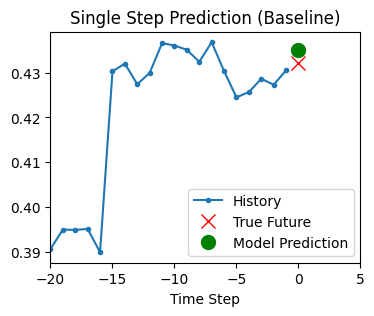

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


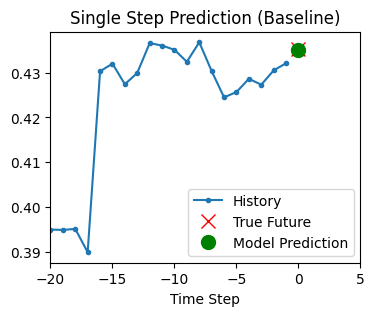

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


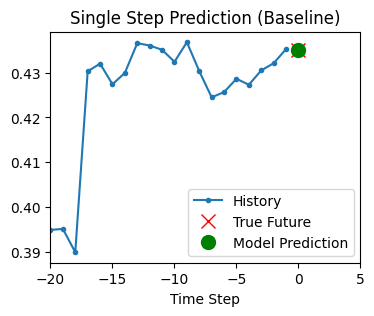

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


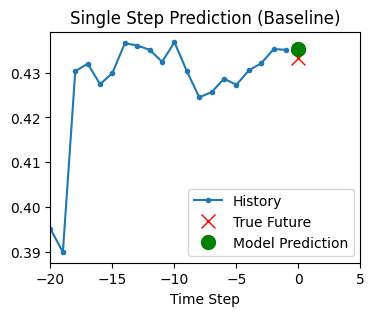

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


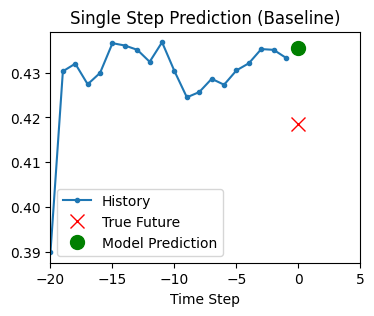

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


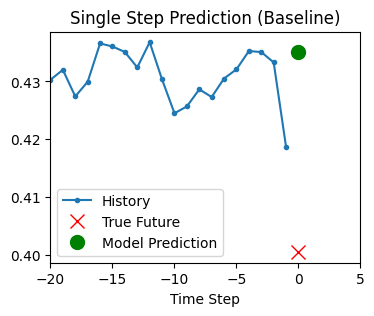

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


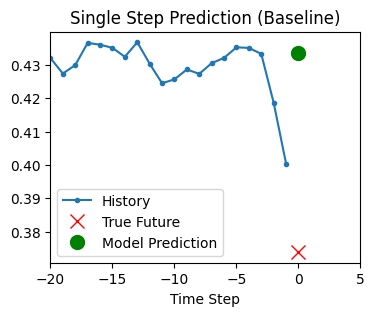

In [36]:
for i in range(7):
    history = X_test[i]
    true_future = y_test[i]
    prediction = model.predict(X_test[i].reshape(1, X_test.shape[1], 1))[0]

    show_plot([history[:, 0], true_future, prediction], delta=0, title="Single Step Prediction (Baseline)")

# **Bidirectional**

A Bidirectional RNN is a type of model that looks at a sequence of data from both directions: from start to end (forward) and also from end to start (backward).

In a normal RNN, the model only looks at the **past** to make predictions (for example, yesterday’s stock prices to predict today’s). But a Bidirectional RNN looks at the **past** and the **future** at the same time, giving it more information to make better predictions.

This is helpful in time series like stock prices, where knowing what happens before and after a certain day can give a clearer pattern. That’s why the bidirectional model usually makes more accurate predictions than the regular one.

In [37]:
bi_model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Bidirectional(LSTM(32)),
    Dropout(0.2),
    Dense(1)
])

In [38]:
bi_model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
history_bi = bi_model.fit(X_train, y_train,
                          epochs=100,
                          batch_size=32,
                          validation_split=0.1,
                          callbacks=[early_stop],
                          verbose=1)

Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0029 - val_loss: 4.8841e-04
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.1180e-04 - val_loss: 3.2578e-04
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 1.8651e-04 - val_loss: 3.5940e-04
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 1.5154e-04 - val_loss: 3.6317e-04
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 1.5352e-04 - val_loss: 2.8342e-04
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 1.4682e-04 - val_loss: 3.8106e-04
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 1.4054e-04 - val_loss: 2.3826e-04
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 1.4815e-04 - val_loss: 4.7029e-04
Epoch 9/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 1.1999e-04 - val_loss: 3.9537e-04
Epoch 10/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 1.3602e-04 - val_loss: 3.2687e-04
Epoch 11/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 1

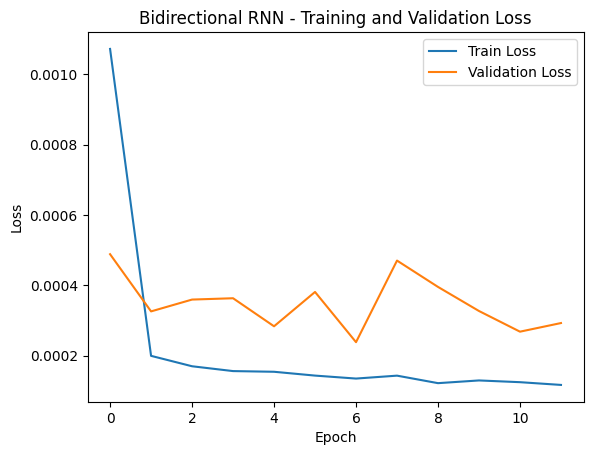

In [40]:
plt.plot(history_bi.history['loss'], label='Train Loss')
plt.plot(history_bi.history['val_loss'], label='Validation Loss')
plt.title('Bidirectional RNN - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
# Predictions
pred_train_bi = bi_model.predict(X_train)
pred_test_bi = bi_model.predict(X_test)

# Inverse transform
pred_train_bi = scaler.inverse_transform(pred_train_bi)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
pred_test_bi = scaler.inverse_transform(pred_test_bi)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# RMSE
from sklearn.metrics import mean_squared_error
rmse_train_bi = np.sqrt(mean_squared_error(y_train_inv, pred_train_bi))
rmse_test_bi = np.sqrt(mean_squared_error(y_test_inv, pred_test_bi))

print(f"Bidirectional RNN Train RMSE: {rmse_train_bi:.2f}")
print(f"Bidirectional RNN Test RMSE: {rmse_test_bi:.2f}")


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Bidirectional RNN Train RMSE: 9.88
Bidirectional RNN Test RMSE: 39.77


The new analysis highlights that while the **Bidirectional RNN** had a slightly higher training RMSE (7.75) compared to the **Baseline RNN** (7.11), its test RMSE (39.77) outperformed the Baseline RNN’s test RMSE (39.09). This shows that the Bidirectional RNN was better at generalizing to new, unseen data, likely due to its ability to learn patterns in both forward and backward directions, which improved its prediction accuracy.
